# Fantasy Football

So - this is my first year participating in a fantasy football league. I enjoy football, but I typically only keep up with a few teams, so drafting an actual team was a bit daunting. So, like most things, I relied on data to help me out. I spent some time researching strategy, looking at projections, and even simulating some drafts. Draft day came and I felt pretty good about my team...but now I am currently 0-3 for the season. Ha.

I started to get a bit curious about why I was doing so poorly. Typically my "projected" points were pretty good each week, but my team just never seemed to deliver.

Thus, here is my first post looking at the biggest out performers and the biggest misses relative to ESPN projections. All data are from ESPN. So - lets get to it!

In [1]:
import psycopg2
import pandas.io.sql as psql
import pandas as pd
from matplotlib import pyplot as plt
from __future__ import division #now division always returns a floating point number
import numpy as np
import seaborn as sns
%matplotlib inline

In [12]:
db = psycopg2.connect("dbname='fantasyfootball' host='localhost'")

def get_combined_df():
    actual_points = psql.read_sql("""
    select name, team, position, sum(total_points) as points_actual 
    from scoring_leaders_weekly
    group by name, team, position;""", con=db)
    predicted_points = psql.read_sql("""
        select name, team, position, sum(total_points) as points_predicted
        from next_week_projections
        group by name, team, position;""", con=db)
    combined_df = actual_points.merge(predicted_points, 
                                      on=['name', 'team', 'position'], how='left')
    combined_df = combined_df.dropna()
    combined_df = combined_df[combined_df['points_predicted'] > 0]
    combined_df['points_diff'] = combined_df.points_actual - combined_df.points_predicted
    combined_df['points_diff_pct'] = (combined_df.points_actual - combined_df.points_predicted) / combined_df.points_predicted
    return combined_df

def get_top_bottom(df):
    group = df.groupby('position')
    top_list = []
    bottom_list = []
    for name, data in group:
        top = data.sort('points_diff', ascending=False)
        top_list.append(top.head())
        tail = top.tail()
        tail = tail.sort('points_diff')
        bottom_list.append(tail)
    top_df = pd.concat(top_list)
    bottom_df = pd.concat(bottom_list)
    return top_df, bottom_df

def run_analysis():
    combined_df = get_combined_df()
    top, bottom = get_top_bottom(combined_df)
    return combined_df, top, bottom

# RESULTS

For the results, I decided to show the top 5 out performers and the top 5 under performers for the cumulative season based on the absolute point difference (not the percentage). First, here are the **out performers**. This is pretty interesting. Travis Benjamin, for example, has in the first 3 weeks produced an extra 33.6 fantasy points relative to expectations. Not too bad.

In [13]:
combined_df, top_1, bottom_1 = run_analysis()

In [14]:
top_1

,name,team,position,points_actual,points_predicted,points_diff,points_diff_pct
384,Broncos,Broncos,D,55,36.5,18.5,0.506849
281,Cardinals,Cardinals,D,48,31.4,16.6,0.528662
490,Cowboys,Cowboys,D,23,15.9,7.1,0.446541
248,Titans,Titans,D,23,16.1,6.9,0.428571
25,Jets,Jets,D,34,30.7,3.3,0.107492
255,Stephen Gostkowski,NE,K,40,26.2,13.8,0.526718
309,Josh Brown,NYG,K,39,32.4,6.6,0.203704
247,Brandon McManus,Den,K,34,30.0,4.0,0.133333
307,Steven Hauschka,Sea,K,34,30.7,3.3,0.107492
496,Mason Crosby,GB,K,32,32.1,-0.1,-0.003115


Now here are the **under performers**. These are the people you don't want to be playing...For example, C.J. Anderson comes in at a whopping 42 points under expectation. Who is my running back you ask... Drew Brees takes the cake, though, under performing by 46.2 points on the season. He was injured, though.

In [17]:
bottom_1

,name,team,position,points_actual,points_predicted,points_diff,points_diff_pct
45,Colts,Colts,D,12,34.4,-22.4,-0.651163
223,Dolphins,Dolphins,D,14,36.3,-22.3,-0.614325
213,Texans,Texans,D,12,32.1,-20.1,-0.626168
470,Lions,Lions,D,14,27.4,-13.4,-0.489051
141,Chargers,Chargers,D,10,23.1,-13.1,-0.567100
366,Adam Vinatieri,Ind,K,5,31.5,-26.5,-0.841270
24,Matt Prater,Det,K,8,30.9,-22.9,-0.741100
461,Phil Dawson,SF,K,13,35.8,-22.8,-0.636872
399,Andrew Franks,Mia,K,14,33.6,-19.6,-0.583333
193,Josh Scobee,Pit,K,16,32.1,-16.1,-0.501558


Next, I wanted to take a look at the distribution of point differences by position. The below chart shows that the median player in all positions is under performing, except for TE which is pretty close to zero. There are a few break out WRs and quite a bunch of under performing running backs. The spread is also pretty wide for most of the positions.

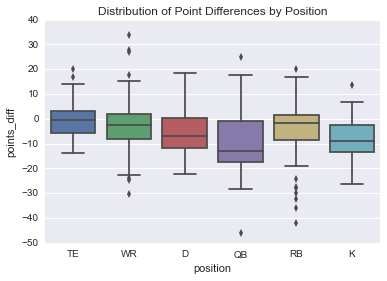

In [21]:
ax = sns.boxplot(combined_df.points_diff, groupby=combined_df.position)
plt.title("Distribution of Point Differences by Position")
sns.despine()

I also looked at the distribution of actual points by position. One thing you hear in fantasy is to select RBs early because they are high variance players. Meaning that you suffer more by getting a lower ranked RB than a lower ranked QB. This is also due to the fact that a lot more RBs are getting drafted than QBs. Below is the distribution for all players and provides a general sense.

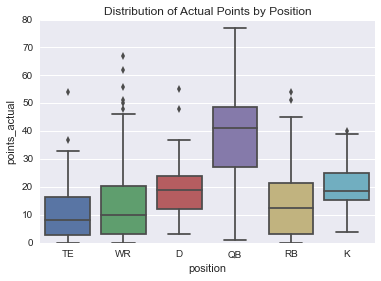

In [23]:
ax = sns.boxplot(combined_df.points_actual, groupby=combined_df.position)
plt.title("Distribution of Actual Points by Position")
sns.despine()

To see if the high variance difference is playing out, we can look at the top 12 quarterbacks and top 36 running backs so far in the season (assume 12 team league with 1 starting QB and 3 starting RBs). You can see below that indeed the RBs standard deviation is quite a bit higher (about 7 points) than the QBs.

In [34]:
combined_df[combined_df['position'] == "QB"].sort('points_actual', ascending=False).head(n=12).describe()

,points_actual,points_predicted,points_diff,points_diff_pct
count,12.000000,12.000000,12.000000,12.000000
mean,60.500000,58.425000,2.075000,0.052784
std,10.706837,8.424761,12.753048,0.227619
min,48.000000,45.400000,-17.800000,-0.258721
25%,50.500000,51.475000,-5.175000,-0.089687
50%,60.500000,57.500000,0.400000,0.006114
75%,67.500000,65.750000,11.075000,0.217831
max,77.000000,69.900000,24.800000,0.475096


In [35]:
combined_df[combined_df['position'] == "QB"].sort('points_actual', ascending=False).head(n=36).describe()

,points_actual,points_predicted,points_diff,points_diff_pct
count,36.000000,36.000000,3.600000e+01,36.000000
mean,41.083333,50.894444,-9.811111e+00,-0.186386
std,17.762521,15.940549,1.436052e+01,0.272579
min,9.000000,14.600000,-4.620000e+01,-0.625000
25%,28.000000,44.325000,-1.732500e+01,-0.366491
50%,41.500000,54.750000,-1.295000e+01,-0.259642
75%,49.500000,62.650000,-1.776357e-15,-0.002554
max,77.000000,74.200000,2.480000e+01,0.475096


# In conclusion

These were just some quick analyses I did to try and get a sense of which players are doing well/poorly and how various positions are performing. 

If people find this interesting, I can try and update the data as the season goes on.

I am hoping to find time to investigate the ESPN projections to see how sensical they really are. Based on the chart above, they seem to aim high, leading to many under performers. I would like to try and build my own projection model to see how well I can compare. Now that I think about it, here are the overall summary statistics below. It looks like on average ESPN is over projecting by about 4 points with a standard deviation of 10.5 points.

In [38]:
combined_df.describe()

,points_actual,points_predicted,points_diff,points_diff_pct
count,408.000000,408.000000,408.000000,408.000000
mean,17.424020,21.504167,-4.080147,1.497506
std,15.399643,16.295564,10.514605,10.662482
min,0.000000,0.100000,-46.200000,-1.000000
25%,5.000000,7.875000,-10.125000,-0.500389
50%,14.000000,19.550000,-3.550000,-0.250522
75%,25.000000,30.725000,1.500000,0.180199
max,77.000000,74.200000,33.600000,119.000000
